In [1]:
!pip install python-terrier


     |████████████████████████████████| 95 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 69 kB 7.1 MB/s 
     |████████████████████████████████| 255 kB 61.3 MB/s 
     |████████████████████████████████| 41 kB 283 kB/s 
     |████████████████████████████████| 294 kB 60.9 MB/s 
     |████████████████████████████████| 126 kB 44.1 MB/s 
     |████████████████████████████████| 6.4 MB 25.4 MB/s 
     |████████████████████████████████| 72 kB 1.5 MB/s 
     |████████████████████████████████| 1.8 MB 40.4 MB/s 
     |████████████████████████████████| 596 kB 27.0 MB/s 
     |████████████████████████████████| 291 kB 47.1 MB/s 
     |████████████████████████████████| 59 kB 7.0 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.7.1-py3-none-any.whl size=102452 sha256=2aaf408fb3fc0e22c5e3e85d07330d4520f65f080a2feb8c9545bc7fad77531f
  Stored in directory: /root/.cac

In [2]:
import pyterrier as pt

In [3]:
if not pt.started():
    pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


In [4]:
pip install jsonlines

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('./drive')
os.chdir('MyDrive')
os.chdir('Colab Notebooks')


Mounted at /content/drive


In [6]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [7]:
import pandas as pd

import jsonlines
all_documents=[]
with open("documents.jsonl", "r+", encoding="utf8") as f:
    for item in jsonlines.Reader(f):
        all_documents.append(item)

In [8]:
import json
all_transcript=[]
for i in range(len(all_documents)):
  try:
    
    all_transcript.append(dict({'id':all_documents[i]['id'],'contents':
                                
                                  '('+str(json.loads(all_documents[i]['contents'])['series'])+' '+ str(json.loads(all_documents[i]['contents'])['episode'])+') '
                                  +json.loads(all_documents[i]['contents'])['actor']+': '+json.loads(all_documents[i]['contents'])['line']+
                                  '('+str(json.loads(all_documents[i+1]['contents'])['series'])+' '+ str(json.loads(all_documents[i+1]['contents'])['episode'])+') '
                                  +json.loads(all_documents[i+1]['contents'])['actor']+': '+json.loads(all_documents[i+1]['contents'])['line'] }))
   



                                  
                                  
                                 
  except:
     all_transcript.append(dict({'id':all_documents[i]['id'],'contents':
                                  '('+str(json.loads(all_documents[i]['contents'])['series'])+' '+ str(json.loads(all_documents[i]['contents'])['episode'])+') '
                                  +json.loads(all_documents[i]['contents'])['actor']+': '+json.loads(all_documents[i]['contents'])['line']
     }))



    
      
    

In [9]:
doc_id=list(all_transcript[i]['id'] for i in range(len(all_transcript)))
context=list(str(all_transcript[i]['contents'] )for i in range(len(all_transcript)))

In [10]:
transcript_df=pd.DataFrame({'docno': doc_id, 'text':context})

In [11]:
transcript_df.head()

,docno,text
0,0,(2 2) Scene: The building entrance lobby. The ...
1,1,(2 2) Sheldon: Worst Renaissance Fair ever.(2 ...
2,2,"(2 2) Leonard: Please let it go, Sheldon.(2 2)..."
3,3,(2 2) Sheldon: It was rife with historical ina...
4,4,(2 2) Leonard: You’re nitpicking.(2 2) Sheldon...


In [12]:
index_dir = '/transcriptedocs_index'
indexer = pt.DFIndexer(index_dir, overwrite=True, blocks=True)
index_ref = indexer.index(transcript_df["text"], transcript_df["docno"])
index_ref.toString()


'/transcriptedocs_index/data.properties'

In [13]:
os.listdir(index_dir)

['data.lexicon.fsomapid',
 'data.meta.zdata',
 'data.inverted.bf',
 'data.meta.idx',
 'data.lexicon.fsomaphash',
 'data.direct.bf',
 'data.properties',
 'data.lexicon.fsomapfile',
 'data.document.fsarrayfile',
 'data.meta-0.fsomapfile']

In [14]:
index = pt.IndexFactory.of(index_ref)

In [15]:
print(index.getCollectionStatistics().toString())

Number of documents: 54936
Number of terms: 14445
Number of postings: 733322
Number of fields: 0
Number of tokens: 889494
Field names: []
Positions:   true



In [16]:
all_query=pd.read_csv("query_new_0-30.csv")

In [17]:
all_query

,query_id,query
0,0,Whom does Penny married to
1,1,Who broke up with Amy
2,2,What did the air force contact Howard about
3,3,Whose job involves audition
4,4,Who win the chance to the North Pole in series 2
5,5,Why do Leonard learn football
6,6,Who gives the lecture in the university
7,7,Who is the only one that do not have a doctor ...
8,8,Who designed the Fun with Flags
9,9,Who went on the Soyuz capsule


In [18]:
bm25 = pt.BatchRetrieve(index, wmodel="BM25")

In [19]:

query_id_temp=[]
query_text=[]
document_id_temp=[]
document_text=[]
for i in range(len(all_query)):
  doc_number=bm25.search(all_query.iloc[i]['query'])['docno'][0:50]
  for j in doc_number:
    query_id_temp.append(i)
    query_text.append(all_query.iloc[i]['query'])
    document_id_temp.append(int(j))
    document_text.append(transcript_df.iloc[int(j)]['text'])




In [80]:
#relevant_df=pd.DataFrame({'query_id': query_id_temp, 'query':query_text, 'transcript_id':document_id_temp, 'transcript':document_text})

In [84]:
#relevant_df.to_csv('new_qa_relevance_0-30.csv')

In [20]:
results=pd.read_csv('new_qa_relevance_0-30.csv')
results.columns=['index','q_id','q_text','trans_id','trans_text','label']

In [21]:
results.head()

,index,q_id,q_text,trans_id,trans_text,label
0,0,0,Whom does Penny married to,33197,"(10 16) Dr Koothrapalli: I have six children, ...",0
1,1,0,Whom does Penny married to,33196,"(10 16) Raj: What are you saying, that you’re ...",0
2,2,0,Whom does Penny married to,12528,(3 11) Beverley: Really? Which one?(3 11) Penn...,0
3,3,0,Whom does Penny married to,12529,(3 11) Penny: The one from whom I live across ...,0
4,4,0,Whom does Penny married to,11801,(3 23) Raj: Really? Us gonna tell him?(3 23) S...,0


In [22]:
all_query.columns=['qid','query']

In [23]:
all_query['qid']=list(str(all_query['qid'][i]) for i in range(len(all_query)))

In [24]:
qrels=pd.DataFrame({'qid':list(str(results['q_id'][i])for i in range(len(results))),'docno':list(str(results['trans_id'][i])for i in range(len(results))),'label':list(float(results['label'][i]) for i in range(len(results)))})


In [41]:
sdm = pt.rewrite.SequentialDependence()
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pipeline1 = sdm >> bm25
bo1 = pt.rewrite.Bo1QueryExpansion(index)
pipeline2 =  bm25 >> bo1 >> bm25
tf= pt.BatchRetrieve(index,  wmodel="Tf")
random=pt.BatchRetrieve(index)
pl2 = pt.BatchRetrieve(index, wmodel="PL2" )
DPH= pt.BatchRetrieve( index, wmodel="DPH")
DLM  = pt.BatchRetrieve(index, wmodel="DirichletLM")

In [26]:
RANK_CUTOFF = 15
SEED=42

from sklearn.model_selection import train_test_split

tr_va_topics, test_topics = train_test_split(all_query, test_size=5, random_state=SEED)
train_topics, valid_topics =  train_test_split(tr_va_topics, test_size=5, random_state=SEED)

In [27]:
train_topics['qid']

11    11
25    25
28    28
14    14
4      4
24    24
2      2
21    21
12    12
0      0
7      7
18    18
10    10
29    29
6      6
5      5
22    22
3      3
20    20
16    16
Name: qid, dtype: object

In [28]:
qrels['label']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1695    0.0
1696    0.0
1697    0.0
1698    0.0
1699    1.0
Name: label, Length: 1700, dtype: float64

In [29]:
qrels

,qid,docno,label
0,0,33197,0.0
1,0,33196,0.0
2,0,12528,0.0
3,0,12529,0.0
4,0,11801,0.0
...,...,...,...
1695,29,2844,0.0
1696,29,6907,0.0
1697,29,52275,0.0
1698,29,34002,0.0


In [30]:
ltr_feats1 = (bm25 % RANK_CUTOFF) >> (
    pt.transformer.IdentityTransformer()
    ** 
    (sdm >> bm25)
    **
    (bm25>>bo1>>bm25)
    **
    pt.BatchRetrieve(index, wmodel="CoordinateMatch")
    **
    tf
  
  
)

# for reference, lets record the feature names here too
fnames=["BM25", "SDM","bo1","coordinateMatch",'Tf']

In [31]:
pip install fastrank

     |████████████████████████████████| 891 kB 7.7 MB/s 


In [32]:
import fastrank

train_request = fastrank.TrainRequest.coordinate_ascent()

params = train_request.params
params.init_random = True
params.normalize = True
params.seed = 1234567

ca_pipe = ltr_feats1 >> pt.ltr.apply_learned_model(train_request, form='fastrank')

%time ca_pipe.fit(train_topics, qrels)

/usr/local/lib/python3.7/dist-packages/pyterrier/transformer.py:760: UserWarning: Got number of results different expected from ComposedPipeline(ComposedPipeline(BR(/transcriptedocs_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDecorator,filters:LocalManager$PostFilterProcess,decorate:SimpleDecorateProcess', 'querying.postfilters': 'decorate:SimpleDecorate,site:SiteFilter,scope:Scope', 'querying.default.controls': 'wmodel:DPH,parsecontrols:on,parseql:on,applypipeline:on,terrierql:on,localmatching:on,filters:on,decorate:o

CPU times: user 5.19 s, sys: 139 ms, total: 5.33 s
Wall time: 3.29 s


In [33]:
qrels=pd.DataFrame({'qid':list(str(results['q_id'][i])for i in range(len(results))),'docno':list(str(results['trans_id'][i])for i in range(len(results))),'label':list(results['label'])})


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, verbose=1, random_state=SEED, n_jobs=2)

rf_pipe = ltr_feats1 >> pt.ltr.apply_learned_model(rf)

%time rf_pipe.fit(train_topics, qrels)

/usr/local/lib/python3.7/dist-packages/pyterrier/transformer.py:760: UserWarning: Got number of results different expected from ComposedPipeline(ComposedPipeline(BR(/transcriptedocs_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDecorator,filters:LocalManager$PostFilterProcess,decorate:SimpleDecorateProcess', 'querying.postfilters': 'decorate:SimpleDecorate,site:SiteFilter,scope:Scope', 'querying.default.controls': 'wmodel:DPH,parsecontrols:on,parseql:on,applypipeline:on,terrierql:on,localmatching:on,filters:on,decorate:o

CPU times: user 3.74 s, sys: 127 ms, total: 3.86 s
Wall time: 2.97 s


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.7s finished


In [35]:
import lightgbm as lgb

# this configures LightGBM as LambdaMART
lmart_l = lgb.LGBMRanker(
    task="train",
    silent=False,
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=1,
    max_bin=255,
    num_leaves=31,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[10],
    ndcg_at=[10],
    eval_at=[10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=100,
)

lmart_l_pipe = ltr_feats1 >> pt.ltr.apply_learned_model(lmart_l, form="ltr", fit_kwargs={'eval_at':[10]})

%time lmart_l_pipe.fit(train_topics, qrels, valid_topics, qrels)

/usr/local/lib/python3.7/dist-packages/pyterrier/transformer.py:760: UserWarning: Got number of results different expected from ComposedPipeline(ComposedPipeline(BR(/transcriptedocs_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDecorator,filters:LocalManager$PostFilterProcess,decorate:SimpleDecorateProcess', 'querying.postfilters': 'decorate:SimpleDecorate,site:SiteFilter,scope:Scope', 'querying.default.controls': 'wmodel:DPH,parsecontrols:on,parseql:on,applypipeline:on,terrierql:on,localmatching:on,filters:on,decorate:o

[1]	valid_0's ndcg@10: 0.657977
[2]	valid_0's ndcg@10: 0.701899
[3]	valid_0's ndcg@10: 0.649203
[4]	valid_0's ndcg@10: 0.651318
[5]	valid_0's ndcg@10: 0.65303
[6]	valid_0's ndcg@10: 0.637784
[7]	valid_0's ndcg@10: 0.638248
[8]	valid_0's ndcg@10: 0.624765
[9]	valid_0's ndcg@10: 0.626732
[10]	valid_0's ndcg@10: 0.654604
[11]	valid_0's ndcg@10: 0.653678
[12]	valid_0's ndcg@10: 0.644213
[13]	valid_0's ndcg@10: 0.653575
[14]	valid_0's ndcg@10: 0.650236
[15]	valid_0's ndcg@10: 0.651327
[16]	valid_0's ndcg@10: 0.666439
[17]	valid_0's ndcg@10: 0.652317
[18]	valid_0's ndcg@10: 0.652317
[19]	valid_0's ndcg@10: 0.652317
[20]	valid_0's ndcg@10: 0.652317
[21]	valid_0's ndcg@10: 0.653247
[22]	valid_0's ndcg@10: 0.651651
[23]	valid_0's ndcg@10: 0.650791
[24]	valid_0's ndcg@10: 0.650791
[25]	valid_0's ndcg@10: 0.650791
[26]	valid_0's ndcg@10: 0.649381
[27]	valid_0's ndcg@10: 0.65069
[28]	valid_0's ndcg@10: 0.652938
[29]	valid_0's ndcg@10: 0.652938
[30]	valid_0's ndcg@10: 0.676881
[31]	valid_0's ndcg@1

In [43]:
pt.Experiment(
    [ca_pipe, rf_pipe,lmart_l_pipe,bm25 % RANK_CUTOFF, random % RANK_CUTOFF],
    test_topics,
    qrels,
    names=["fastrank","random forest", "LambdaMart","bm25","random"],
    eval_metrics=["map", "ndcg","ndcg_cut_3","ndcg_cut_5","ndcg_cut_10"])

/usr/local/lib/python3.7/dist-packages/pyterrier/transformer.py:760: UserWarning: Got number of results different expected from ComposedPipeline(ComposedPipeline(BR(/transcriptedocs_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDecorator,filters:LocalManager$PostFilterProcess,decorate:SimpleDecorateProcess', 'querying.postfilters': 'decorate:SimpleDecorate,site:SiteFilter,scope:Scope', 'querying.default.controls': 'wmodel:DPH,parsecontrols:on,parseql:on,applypipeline:on,terrierql:on,localmatching:on,filters:on,decorate:o

,name,map,ndcg,ndcg_cut_3,ndcg_cut_5,ndcg_cut_10
0,fastrank,0.484836,0.621716,0.823464,0.872413,0.830375
1,random forest,0.456058,0.595468,0.811175,0.808077,0.782920
2,LambdaMart,0.459683,0.607342,0.859216,0.826704,0.818020
3,bm25,0.448927,0.596969,0.770392,0.763995,0.750469
4,random,0.511445,0.699132,0.953072,0.912116,0.888002


In [40]:
pt.Experiment(
    [ca_pipe, rf_pipe,lmart_l_pipe,bm25 % RANK_CUTOFF],
    valid_topics,
    qrels,
    names=["fastrank","random forest", "LambdaMart","bm25"],
    eval_metrics=["map", "ndcg","ndcg_cut_3","ndcg_cut_5","ndcg_cut_10"])

/usr/local/lib/python3.7/dist-packages/pyterrier/transformer.py:760: UserWarning: Got number of results different expected from ComposedPipeline(ComposedPipeline(BR(/transcriptedocs_index/data.properties,{'terrierql': 'on', 'parsecontrols': 'on', 'parseql': 'on', 'applypipeline': 'on', 'localmatching': 'on', 'filters': 'on', 'decorate': 'on', 'wmodel': 'BM25'},{'querying.processes': 'terrierql:TerrierQLParser,parsecontrols:TerrierQLToControls,parseql:TerrierQLToMatchingQueryTerms,matchopql:MatchingOpQLParser,applypipeline:ApplyTermPipeline,context_wmodel:org.terrier.python.WmodelFromContextProcess,localmatching:LocalManager$ApplyLocalMatching,qe:QueryExpansion,labels:org.terrier.learning.LabelDecorator,filters:LocalManager$PostFilterProcess,decorate:SimpleDecorateProcess', 'querying.postfilters': 'decorate:SimpleDecorate,site:SiteFilter,scope:Scope', 'querying.default.controls': 'wmodel:DPH,parsecontrols:on,parseql:on,applypipeline:on,terrierql:on,localmatching:on,filters:on,decorate:o

,name,map,ndcg,ndcg_cut_3,ndcg_cut_5,ndcg_cut_10
0,fastrank,0.485355,0.614555,0.793856,0.808680,0.750049
1,random forest,0.464562,0.579216,0.712289,0.668033,0.668065
2,LambdaMart,0.470906,0.577422,0.700000,0.686879,0.684097
3,bm25,0.482446,0.621338,0.853072,0.797509,0.771324


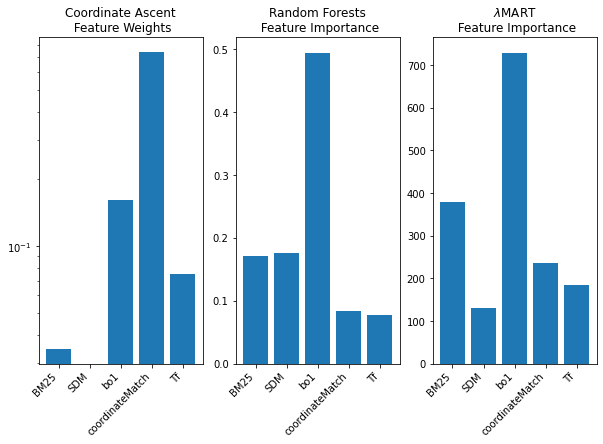

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 6))

ax0.bar(np.arange(len(fnames)), ca_pipe[1].model.to_dict()['Linear']['weights'])
ax0.set_xticks(np.arange(len(fnames)))
ax0.set_xticklabels(fnames, rotation=45, ha='right')
ax0.set_title("Coordinate Ascent\n Feature Weights")
ax0.set_yscale('log')

ax1.bar(np.arange(len(fnames)), rf.feature_importances_)
ax1.set_xticks(np.arange(len(fnames)))
ax1.set_xticklabels(fnames, rotation=45, ha='right')
ax1.set_title("Random Forests\n Feature Importance")

ax2.bar(np.arange(len(fnames)), lmart_l.feature_importances_)
ax2.set_xticks(np.arange(len(fnames)))
ax2.set_xticklabels(fnames, rotation=45, ha='right')
ax2.set_title("$\lambda$MART\n Feature Importance")






fig.show()